In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import sklearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [2]:
%pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pd.set_option('display.max_columns', None)
# Load the CSV file
df = pd.read_csv('./data/Airbnb_Data.csv')

In [4]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [5]:
df.head(5)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [6]:
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [7]:
# df=df.drop(columns = ["number_of_reviews","id","longitude","name","first_review","description","amenities","thumbnail_url","host_since","last_review","neighbourhood","latitude","host_response_rate","zipcode"])
df=df.drop(columns = ["number_of_reviews","id","name","first_review","description","amenities","thumbnail_url","host_since","last_review","neighbourhood","host_response_rate","zipcode"])


In [8]:
def onehot_encodage(df,column_name):
    one_hot_encod = pd.get_dummies(df[column_name])
    df_new = pd.concat([df, one_hot_encod], axis=1)
    df_new=df_new.drop(columns = [column_name])
    return df_new

def transformation_to_bool(df, column_name):
    df[column_name] = df[column_name].map({'t': True, 'f': False})
    return df

In [9]:
list_one_hot_column = ["bed_type","property_type","room_type","cancellation_policy","city"]
list_transformation_to_bool = ["bed_type","property_type","room_type","cancellation_policy"]

df_new=onehot_encodage(df,'bed_type')
df_new=onehot_encodage(df_new,'property_type')
df_new=onehot_encodage(df_new,'room_type')
df_new=onehot_encodage(df_new,'cancellation_policy')
df_new=onehot_encodage(df_new,'city')


df_new=transformation_to_bool(df_new,'host_has_profile_pic')
df_new=transformation_to_bool(df_new,'host_identity_verified')
df_new=transformation_to_bool(df_new,'instant_bookable')


In [10]:
df_new

,log_price,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,latitude,longitude,review_scores_rating,bedrooms,beds,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Apartment,Bed & Breakfast,Boat,Boutique hotel,Bungalow,Cabin,Camper/RV,Casa particular,Castle,Cave,Chalet,Condominium,Dorm,Earth House,Guest suite,Guesthouse,Hostel,House,Hut,In-law,Island,Lighthouse,Loft,Other,Parking Space,Serviced apartment,Tent,Timeshare,Tipi,Townhouse,Train,Treehouse,Vacation home,Villa,Yurt,Entire home/apt,Private room,Shared room,flexible,moderate,strict,super_strict_30,super_strict_60,Boston,Chicago,DC,LA,NYC,SF
0,5.010635,3,1.0,True,True,True,False,40.696524,-73.991617,100.0,1.0,1.0,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False
1,5.129899,7,1.0,True,True,False,True,40.766115,-73.989040,93.0,3.0,3.0,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False
2,4.976734,5,1.0,True,True,True,True,40.808110,-73.943756,92.0,1.0,3.0,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False
3,6.620073,4,1.0,True,True,True,False,37.772004,-122.431619,NaN,2.0,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True
4,4.744932,2,1.0,True,True,True,True,38.925627,-77.034596,40.0,0.0,1.0,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,1,1.0,False,True,True,False,40.709025,-73.939405,NaN,1.0,1.0,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False
74107,5.043425,4,2.0,True,True,False,False,33.871549,-118.396053,93.0,2.0,4.0,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False
74108,5.220356,5,1.0,True,True,True,True,40.706749,-73.942377,94.0,2.0,2.0,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,

/tmp/ipykernel_82455/2506571371.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='property_type', palette='viridis')


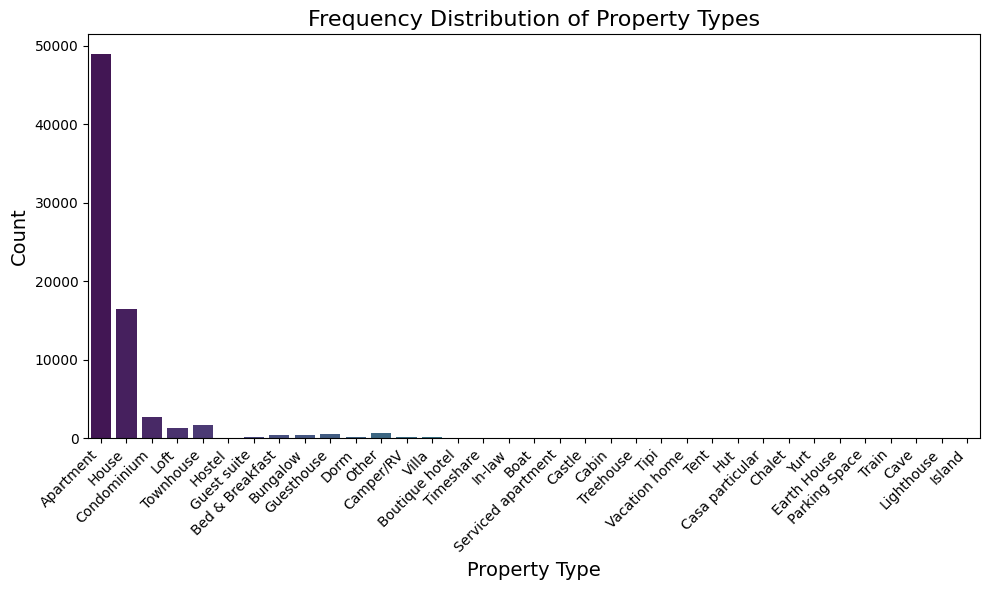

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='property_type', palette='viridis')

plt.title('Frequency Distribution of Property Types', fontsize=16)
plt.xlabel('Property Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()


In [12]:
nan_counts = df_new.isna().sum().sort_values(ascending=False)
print(nan_counts)

review_scores_rating      16722
bathrooms                   200
host_has_profile_pic        188
host_identity_verified      188
beds                        131
                          ...  
Earth House                   0
Guest suite                   0
Guesthouse                    0
accommodates                  0
SF                            0
Length: 66, dtype: int64


In [13]:
nan_counts = df_new.isna().sum().sort_values(ascending=False)
for column,nan_count in nan_counts.items():
    if nan_count != 0:
        print(column," ",nan_count)


review_scores_rating   16722
bathrooms   200
host_has_profile_pic   188
host_identity_verified   188
beds   131
bedrooms   91


In [14]:
df_new["review_scores_rating"].size

74111

In [15]:
#df_new['host_response_rate'].describe()

In [16]:
df_new['review_scores_rating'].describe()

count    57389.000000
mean        94.067365
std          7.836556
min         20.000000
25%         92.000000
50%         96.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64

In [17]:
tmp=df_new['review_scores_rating'].median()
df_new['review_scores_rating']= df_new['review_scores_rating'].fillna(value=tmp)
# df_new=df_new.drop(columns = ['Apartment'])

In [18]:
nan_counts = df_new.isna().sum().sort_values(ascending=False)
for column,nan_count in nan_counts.items():
    if nan_count != 0:
        print(column," ",nan_count)


bathrooms   200
host_has_profile_pic   188
host_identity_verified   188
beds   131
bedrooms   91


In [19]:
df_new.columns

Index(['log_price', 'accommodates', 'bathrooms', 'cleaning_fee',
       'host_has_profile_pic', 'host_identity_verified', 'instant_bookable',
       'latitude', 'longitude', 'review_scores_rating', 'bedrooms', 'beds',
       'Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Apartment',
       'Bed & Breakfast', 'Boat', 'Boutique hotel', 'Bungalow', 'Cabin',
       'Camper/RV', 'Casa particular', 'Castle', 'Cave', 'Chalet',
       'Condominium', 'Dorm', 'Earth House', 'Guest suite', 'Guesthouse',
       'Hostel', 'House', 'Hut', 'In-law', 'Island', 'Lighthouse', 'Loft',
       'Other', 'Parking Space', 'Serviced apartment', 'Tent', 'Timeshare',
       'Tipi', 'Townhouse', 'Train', 'Treehouse', 'Vacation home', 'Villa',
       'Yurt', 'Entire home/apt', 'Private room', 'Shared room', 'flexible',
       'moderate', 'strict', 'super_strict_30', 'super_strict_60', 'Boston',
       'Chicago', 'DC', 'LA', 'NYC', 'SF'],
      dtype='object')

In [20]:
df_new.dtypes

log_price               float64
accommodates              int64
bathrooms               float64
cleaning_fee               bool
host_has_profile_pic     object
                         ...   
Chicago                    bool
DC                         bool
LA                         bool
NYC                        bool
SF                         bool
Length: 66, dtype: object

In [21]:
df.columns

Index(['log_price', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_has_profile_pic', 'host_identity_verified', 'instant_bookable',
       'latitude', 'longitude', 'review_scores_rating', 'bedrooms', 'beds'],
      dtype='object')

In [22]:
df_new.dtypes

log_price               float64
accommodates              int64
bathrooms               float64
cleaning_fee               bool
host_has_profile_pic     object
                         ...   
Chicago                    bool
DC                         bool
LA                         bool
NYC                        bool
SF                         bool
Length: 66, dtype: object

In [23]:
column_types = {
    'log_price': 'float64',
    'accommodates': 'int64',
    'bathrooms': 'float64',
    # 'city': 'string',
    'host_has_profile_pic': 'bool',
    'host_identity_verified': 'bool',
    # 'zipcode': 'string',
    'bedrooms': 'float64',
    'beds': 'float64',
}

df_new = df_new.astype(column_types)

In [24]:
df_new=df_new.dropna()

In [25]:
nan_counts = df_new.isna().sum().sort_values(ascending=False)
for column,nan_count in nan_counts.items():
    if nan_count != 0:
        print(column," ",nan_count)

In [26]:
def convert_bool_to_int(df):
    # Sélectionne toutes les colonnes de type bool et les transforme en int
    for col in df.select_dtypes(include='bool').columns:
        df[col] = df[col].astype(int)
    return df
df_new = convert_bool_to_int(df_new)

In [27]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73766 entries, 0 to 74110
Data columns (total 66 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               73766 non-null  float64
 1   accommodates            73766 non-null  int64  
 2   bathrooms               73766 non-null  float64
 3   cleaning_fee            73766 non-null  int64  
 4   host_has_profile_pic    73766 non-null  int64  
 5   host_identity_verified  73766 non-null  int64  
 6   instant_bookable        73766 non-null  int64  
 7   latitude                73766 non-null  float64
 8   longitude               73766 non-null  float64
 9   review_scores_rating    73766 non-null  float64
 10  bedrooms                73766 non-null  float64
 11  beds                    73766 non-null  float64
 12  Airbed                  73766 non-null  int64  
 13  Couch                   73766 non-null  int64  
 14  Futon                   73766 non-null  int

In [28]:
df_new.columns

Index(['log_price', 'accommodates', 'bathrooms', 'cleaning_fee',
       'host_has_profile_pic', 'host_identity_verified', 'instant_bookable',
       'latitude', 'longitude', 'review_scores_rating', 'bedrooms', 'beds',
       'Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Apartment',
       'Bed & Breakfast', 'Boat', 'Boutique hotel', 'Bungalow', 'Cabin',
       'Camper/RV', 'Casa particular', 'Castle', 'Cave', 'Chalet',
       'Condominium', 'Dorm', 'Earth House', 'Guest suite', 'Guesthouse',
       'Hostel', 'House', 'Hut', 'In-law', 'Island', 'Lighthouse', 'Loft',
       'Other', 'Parking Space', 'Serviced apartment', 'Tent', 'Timeshare',
       'Tipi', 'Townhouse', 'Train', 'Treehouse', 'Vacation home', 'Villa',
       'Yurt', 'Entire home/apt', 'Private room', 'Shared room', 'flexible',
       'moderate', 'strict', 'super_strict_30', 'super_strict_60', 'Boston',
       'Chicago', 'DC', 'LA', 'NYC', 'SF'],
      dtype='object')

In [29]:
# df_new=df_new.drop("Apartment")

# SPLIT

In [30]:
the_random_state = 30
# df_new['log_price'] = np.exp(df_new['log_price'])
list_of_x_cols = df_new.columns.difference(['log_price']).tolist()
X_train, X_test, y_train, y_test = train_test_split(df_new[list_of_x_cols], df_new["log_price"],test_size=0.3, random_state= the_random_state)

In [31]:
print("Taille du dataset " +str(len(df_new)))

Taille du dataset 73766


In [32]:
def pourcentage_de_bonne_prediction_selon_nous(y_test_pred):
    min_ecart = 0
    max_ecart = 1
    ecarts = np.abs(y_test_pred - y_test)
    ecart_dasn_intervalle = np.where((ecarts >= min_ecart) & (ecarts <= max_ecart))[0]
    return (len(ecart_dasn_intervalle)/len(y_test_pred))*100

In [33]:
X_train

,Airbed,Apartment,Bed & Breakfast,Boat,Boston,Boutique hotel,Bungalow,Cabin,Camper/RV,Casa particular,Castle,Cave,Chalet,Chicago,Condominium,Couch,DC,Dorm,Earth House,Entire home/apt,Futon,Guest suite,Guesthouse,Hostel,House,Hut,In-law,Island,LA,Lighthouse,Loft,NYC,Other,Parking Space,Private room,Pull-out Sofa,Real Bed,SF,Serviced apartment,Shared room,Tent,Timeshare,Tipi,Townhouse,Train,Treehouse,Vacation home,Villa,Yurt,accommodates,bathrooms,bedrooms,beds,cleaning_fee,flexible,host_has_profile_pic,host_identity_verified,instant_bookable,latitude,longitude,moderate,review_scores_rating,strict,super_strict_30,super_strict_60
60113,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4,1.0,1.0,2.0,1,0,1,1,0,33.996385,-118.465953,0,91.0,1,0,0
31915,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,6,1.0,2.0,3.0,1,0,1,1,0,37.714529,-122.452748,0,92.0,1,0,0
38901,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,8,2.0,3.0,3.0,0,0,1,1,0,40.730487,-74.001143,0,96.0,1,0,0
52569,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,1.0,1.0,1,0,1,1,0,40.725622,-73.979481,0,98.0,1,0,0
72013,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,1.0,1.0,1.0,1,0,1,1,1,40.689475,-73.915439,1,90.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66761,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,0.0,1.0,0,1,1,0,1,40.700343,-73.936932,0,100.0,0,0,0
46437,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,2.0,2.0,3.0,1,0,1,1,1,34.061996,-118.291091,0,92.0,1,0,0
48273,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,16,7.0,6.0,8.0,1,0,1,0,0,34.044763,-118.483489,1,100.0,0,0,0
70378,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,1.0,1.0,1,0,1,1,0,34.088163,-118.328785,0,99.0,1,0,0


In [34]:
X_test

,Airbed,Apartment,Bed & Breakfast,Boat,Boston,Boutique hotel,Bungalow,Cabin,Camper/RV,Casa particular,Castle,Cave,Chalet,Chicago,Condominium,Couch,DC,Dorm,Earth House,Entire home/apt,Futon,Guest suite,Guesthouse,Hostel,House,Hut,In-law,Island,LA,Lighthouse,Loft,NYC,Other,Parking Space,Private room,Pull-out Sofa,Real Bed,SF,Serviced apartment,Shared room,Tent,Timeshare,Tipi,Townhouse,Train,Treehouse,Vacation home,Villa,Yurt,accommodates,bathrooms,bedrooms,beds,cleaning_fee,flexible,host_has_profile_pic,host_identity_verified,instant_bookable,latitude,longitude,moderate,review_scores_rating,strict,super_strict_30,super_strict_60
51744,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4,1.0,2.0,2.0,1,0,1,1,0,40.718999,-73.986864,0,88.0,1,0,0
12482,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,1.0,1.0,2.0,1,1,1,1,0,40.687816,-73.935003,0,96.0,0,0,0
36601,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4,1.0,0.0,2.0,1,0,1,0,0,34.064622,-118.427560,0,100.0,1,0,0
48070,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4,1.0,2.0,2.0,1,0,1,0,0,34.010917,-118.474445,1,98.0,0,0,0
31132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2,1.0,1.0,1.0,0,0,1,1,0,38.931287,-77.032101,0,93.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8508,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,1.0,1.0,1.0,1,0,1,0,0,40.761277,-73.996167,1,95.0,0,0,0
53432,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,1.0,1.0,2.0,1,0,1,0,1,40.792209,-73.973314,1,96.0,0,0,0
36479,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,1.0,1.0,0,0,1,1,1,34.099191,-118.344272,0,98.0,1,0,0
32211,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4,1.0,3.0,2.0,1,0,1,1,0,41.759761,-87.604372,0,96.0,1,0,0


In [35]:
y_train

60113    5.043425
31915    5.204007
38901    6.551080
52569    4.718499
72013    3.912023
           ...   
66761    4.317488
46437    5.541264
48273    7.003065
70378    4.317488
38879    5.075174
Name: log_price, Length: 51636, dtype: float64

# Standardisation

In [36]:
numeric_columns = ['accommodates','bathrooms', 'review_scores_rating', 'beds','review_scores_rating','bedrooms']
# numeric_columns = ['accommodates','bathrooms', 'review_scores_rating', 'beds','review_scores_rating','bedrooms','longitude','latitude']

scaler = StandardScaler()
# scaler = MinMaxScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [37]:

# from sklearn.preprocessing import normalize

# numeric_columns = ['accommodates', 'bathrooms', 'review_scores_rating', 'beds', 'review_scores_rating', 'bedrooms']


# X_train_scaled = X_train.copy()
# X_test_scaled = X_test.copy()

# X_train_scaled[numeric_columns] = normalize(X_train[numeric_columns], axis=1) 
# X_test_scaled[numeric_columns] = normalize(X_test[numeric_columns], axis=1)

In [38]:
X_train

,Airbed,Apartment,Bed & Breakfast,Boat,Boston,Boutique hotel,Bungalow,Cabin,Camper/RV,Casa particular,Castle,Cave,Chalet,Chicago,Condominium,Couch,DC,Dorm,Earth House,Entire home/apt,Futon,Guest suite,Guesthouse,Hostel,House,Hut,In-law,Island,LA,Lighthouse,Loft,NYC,Other,Parking Space,Private room,Pull-out Sofa,Real Bed,SF,Serviced apartment,Shared room,Tent,Timeshare,Tipi,Townhouse,Train,Treehouse,Vacation home,Villa,Yurt,accommodates,bathrooms,bedrooms,beds,cleaning_fee,flexible,host_has_profile_pic,host_identity_verified,instant_bookable,latitude,longitude,moderate,review_scores_rating,strict,super_strict_30,super_strict_60
60113,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4,1.0,1.0,2.0,1,0,1,1,0,33.996385,-118.465953,0,91.0,1,0,0
31915,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,6,1.0,2.0,3.0,1,0,1,1,0,37.714529,-122.452748,0,92.0,1,0,0
38901,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,8,2.0,3.0,3.0,0,0,1,1,0,40.730487,-74.001143,0,96.0,1,0,0
52569,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,1.0,1.0,1,0,1,1,0,40.725622,-73.979481,0,98.0,1,0,0
72013,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,1.0,1.0,1.0,1,0,1,1,1,40.689475,-73.915439,1,90.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66761,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,0.0,1.0,0,1,1,0,1,40.700343,-73.936932,0,100.0,0,0,0
46437,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,2.0,2.0,3.0,1,0,1,1,1,34.061996,-118.291091,0,92.0,1,0,0
48273,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,16,7.0,6.0,8.0,1,0,1,0,0,34.044763,-118.483489,1,100.0,0,0,0
70378,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,1.0,1.0,1,0,1,1,0,34.088163,-118.328785,0,99.0,1,0,0


In [39]:
X_train_scaled

,Airbed,Apartment,Bed & Breakfast,Boat,Boston,Boutique hotel,Bungalow,Cabin,Camper/RV,Casa particular,Castle,Cave,Chalet,Chicago,Condominium,Couch,DC,Dorm,Earth House,Entire home/apt,Futon,Guest suite,Guesthouse,Hostel,House,Hut,In-law,Island,LA,Lighthouse,Loft,NYC,Other,Parking Space,Private room,Pull-out Sofa,Real Bed,SF,Serviced apartment,Shared room,Tent,Timeshare,Tipi,Townhouse,Train,Treehouse,Vacation home,Villa,Yurt,accommodates,bathrooms,bedrooms,beds,cleaning_fee,flexible,host_has_profile_pic,host_identity_verified,instant_bookable,latitude,longitude,moderate,review_scores_rating,strict,super_strict_30,super_strict_60
60113,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.391905,-0.404645,-0.312158,0.230323,1,0,1,1,0,33.996385,-118.465953,0,-0.495566,1,0,0
31915,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1.323234,-0.404645,0.862582,1.031248,1,0,1,1,0,37.714529,-122.452748,0,-0.353048,1,0,0
38901,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.254564,1.330397,2.037322,1.031248,0,0,1,1,0,40.730487,-74.001143,0,0.217022,1,0,0
52569,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.539425,-0.404645,-0.312158,-0.570603,1,0,1,1,0,40.725622,-73.979481,0,0.502058,1,0,0
72013,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.073760,-0.404645,-0.312158,-0.570603,1,0,1,1,1,40.689475,-73.915439,1,-0.638084,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66761,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.539425,-0.404645,-1.486899,-0.570603,0,1,1,0,1,40.700343,-73.936932,0,0.787093,0,0,0
46437,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.323234,1.330397,0.862582,1.031248,1,0,1,1,1,34.061996,-118.291091,0,-0.353048,1,0,0
48273,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5.979882,10.005606,5.561544,5.035877,1,0,1,0,0,34.044763,-118.483489,1,0.787093,0,0,0
70378,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.539425,-0.404645,-0.312158,-0.570603,1,0,1,1,0,34.088163,-118.328785,0,0.644576,1,0,0


# Modeles

## Régression linéaire après une standardisation et un PCA 

In [40]:
pca = PCA()
pca.fit(X_train_scaled)

# Extraction des ratios de variance expliquée pour chaque composant principal
explained_variance_ratio = pca.explained_variance_ratio_
best_pc_index = explained_variance_ratio.argmax()

best_pc_loadings = pca.components_[best_pc_index]

# Créer un df pour associer les noms aux coefficients
loadings_df = pd.DataFrame({
    'feature': X_train.columns,  
    'loading': best_pc_loadings
})

# Trier les caractéristiques par la valeur absolue des coefficients (importance relative)
top_features = loadings_df.reindex(loadings_df['loading'].abs().sort_values(ascending=False).index)

# Sélectionner les n caractéristiques les plus importantes
top_n_features = 22
selected_features = top_features.head(top_n_features)['feature'].tolist()

# Afficher les noms des caractéristiques sélectionnées et leur nombre
print(selected_features)
print(len(selected_features))

# Filtrer les données pour ne conserver que les caractéristiques sélectionnées dans les ensembles d'entraînement et de test
X_train_selected = X_train_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]


['longitude', 'latitude', 'NYC', 'LA', 'Apartment', 'bathrooms', 'House', 'SF', 'accommodates', 'beds', 'bedrooms', 'DC', 'Boston', 'review_scores_rating', 'cleaning_fee', 'Private room', 'host_identity_verified', 'Entire home/apt', 'Chicago', 'moderate', 'Guesthouse', 'Condominium']
22


In [41]:
best_pc_loadings = pca.components_[best_pc_index]

In [42]:
model2 = LinearRegression()
model2.fit(X_train_selected, y_train)
y_pred2 = model2.predict(X_test_selected)

In [43]:

mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f" Erreur quadratique: {mse}")
print(f"R2 (r carré) {r2}")
print("Pourcentage de bonne réponse selon nous "+str(pourcentage_de_bonne_prediction_selon_nous(y_pred2))+" %")

 Erreur quadratique: 0.22148630469040814
R2 (r carré) 0.5704646714914217
Pourcentage de bonne réponse selon nous 96.16809760506099 %


## Régression linéaire sans PCA ni rien

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:

y_pred = model.predict(X_test)

In [46]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" Erreur quadratique: {mse}")
print(f"R2 (r carré) {r2}")
print("Pourcentage de bonne réponse selon nous "+str(pourcentage_de_bonne_prediction_selon_nous(y_pred))+" %")


 Erreur quadratique: 0.21877574821591012
R2 (r carré) 0.5757213385677087
Pourcentage de bonne réponse selon nous 96.25847266154541 %


## Random Forest

In [47]:
# rf_model = RandomForestRegressor(n_estimators=60, random_state=42)
#rf_model = RandomForestRegressor(n_estimators=60, random_state=42,max_depth=15,min_samples_leaf=7,max_features=22)

rf_model = RandomForestRegressor(n_estimators=100, random_state=40,max_depth=12,min_samples_leaf=7,max_features=22,bootstrap=True)
#rf_model = RandomForestRegressor(n_estimators=60, random_state=42,max_depth=15,min_samples_leaf=7,bootstrap=True)

rf_model.fit(X_train_scaled, y_train)


y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)


mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print(f"Erreur Quadratique Moyenne (Entraînement) : {mse_train_rf}")
print(f"Erreur Quadratique Moyenne (Test) : {mse_test_rf}")
print(f"R2 Score (Entraînement) : {r2_train_rf}")
print(f"R2 Score (Test) : {r2_test_rf}")
print("Pourcentage de bonne réponse selon nous "+str(pourcentage_de_bonne_prediction_selon_nous(y_pred))+" %")




Erreur Quadratique Moyenne (Entraînement) : 0.1476628985385437
Erreur Quadratique Moyenne (Test) : 0.1699341373058275
R2 Score (Entraînement) : 0.7131984776772129
R2 Score (Test) : 0.6704414045170461
Pourcentage de bonne réponse selon nous 96.25847266154541 %


In [48]:

errors = abs(y_test_pred_rf - y_test)


min_error_index = errors.argmin()
max_error_index = errors.argmax()

print(f"Test avec la prédiction la plus proche du vrai prix :")
print(f"Index: {min_error_index}, Vrai prix: {y_test.iloc[min_error_index]}, Prédiction: {y_test_pred_rf[min_error_index]}")

print(f"\nTest avec la prédiction la plus éloignée du vrai prix :")
print(f"Index: {max_error_index}, Vrai prix: {y_test.iloc[max_error_index]}, Prédiction: {y_test_pred_rf[max_error_index]}")

Test avec la prédiction la plus proche du vrai prix :
Index: 20056, Vrai prix: 4.30406509320417, Prédiction: 4.304047999051441

Test avec la prédiction la plus éloignée du vrai prix :
Index: 11430, Vrai prix: 1.6094379124341005, Prédiction: 5.147592235049545


### Quelques affichages

In [49]:
ecarts = np.abs(y_test_pred_rf - y_test)


ecart_min = 1
ecart_max = 100

indices_ecarts = np.where((ecarts >= ecart_min) & (ecarts <= ecart_max))[0]

print(f"\nLignes de X_test avec un écart dans l'intervalle [{ecart_min}, {ecart_max}]:\n")
print(len(X_test))
print(len(indices_ecarts))
for idx in indices_ecarts:
    print(f"Index: {idx}")
    print(f"X_test : {X_test.iloc[idx].to_dict()}")
    print(f"Vraie valeur (y_test): {y_test.iloc[idx]}")
    print(f"Prédiction : {y_test_pred_rf[idx]}")
    print(f"Écart : {ecarts.iloc[idx]}")
    print("-" * 50)



Lignes de X_test avec un écart dans l'intervalle [1, 100]:

22130
594
Index: 31
X_test : {'Airbed': 0.0, 'Apartment': 0.0, 'Bed & Breakfast': 0.0, 'Boat': 0.0, 'Boston': 0.0, 'Boutique hotel': 0.0, 'Bungalow': 0.0, 'Cabin': 0.0, 'Camper/RV': 0.0, 'Casa particular': 0.0, 'Castle': 0.0, 'Cave': 0.0, 'Chalet': 0.0, 'Chicago': 0.0, 'Condominium': 0.0, 'Couch': 0.0, 'DC': 0.0, 'Dorm': 0.0, 'Earth House': 0.0, 'Entire home/apt': 0.0, 'Futon': 0.0, 'Guest suite': 0.0, 'Guesthouse': 0.0, 'Hostel': 0.0, 'House': 0.0, 'Hut': 0.0, 'In-law': 0.0, 'Island': 0.0, 'LA': 0.0, 'Lighthouse': 0.0, 'Loft': 1.0, 'NYC': 1.0, 'Other': 0.0, 'Parking Space': 0.0, 'Private room': 1.0, 'Pull-out Sofa': 0.0, 'Real Bed': 1.0, 'SF': 0.0, 'Serviced apartment': 0.0, 'Shared room': 0.0, 'Tent': 0.0, 'Timeshare': 0.0, 'Tipi': 0.0, 'Townhouse': 0.0, 'Train': 0.0, 'Treehouse': 0.0, 'Vacation home': 0.0, 'Villa': 0.0, 'Yurt': 0.0, 'accommodates': 3.0, 'bathrooms': 3.5, 'bedrooms': 1.0, 'beds': 1.0, 'cleaning_fee': 0.0, '

### Affichage des meilleurs et des pires erreurs

In [50]:
ligne_min_error = X_test.iloc[min_error_index]["LA"]
ligne_max_error = X_test.iloc[max_error_index]
ligne_y_max_error = y_test.iloc[max_error_index]

print(f"Ligne avec l'erreur minimale (index {min_error_index}):")
print(ligne_min_error)

print(f"\nLigne avec l'erreur maximale (index {max_error_index}):")
print(ligne_max_error)


print(f"\nLigne Y avec l'erreur maximale (index {ligne_y_max_error}):")
print(ligne_y_max_error)

Ligne avec l'erreur minimale (index 20056):
1.0

Ligne avec l'erreur maximale (index 11430):
Airbed                    0.0
Apartment                 1.0
Bed & Breakfast           0.0
Boat                      0.0
Boston                    0.0
                        ...  
moderate                  0.0
review_scores_rating    100.0
strict                    0.0
super_strict_30           0.0
super_strict_60           0.0
Name: 3898, Length: 65, dtype: float64

Ligne Y avec l'erreur maximale (index 1.6094379124341005):
1.6094379124341005


In [51]:
def plot_column_vs_target_by_name(X_train, y_train, column_name):
    if column_name in X_train.columns:
        x_column = X_train[column_name]
    else:
        raise ValueError(f"colonne '{column_name}' pas la")

    plt.figure(figsize=(8, 6))
    plt.scatter(x_column, y_train, color='blue', alpha=0.5)
    plt.xlabel(column_name)
    plt.ylabel('(y_train)')
    plt.title(f'{column_name} de X_train vs y_train')
    plt.show()


# plot_column_vs_target_by_name(X_train, y_train, column_name='beds')
# plot_column_vs_target_by_name(X_train, y_train, column_name='review_scores_rating')


## KNN Plus proches voisins

In [52]:

model = KNeighborsRegressor(n_neighbors=28,weights='uniform',metric='manhattan')
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Erreur Quadratique Moyenne (Entraînement) : {mse_train}")
print(f"Erreur Quadratique Moyenne (Test) : {mse_test}")
print(f"R2 Score (Entraînement) : {r2_train}")
print(f"R2 Score (Test) : {r2_test}")
print("Pourcentage de bonne réponse selon nous "+str(pourcentage_de_bonne_prediction_selon_nous(y_pred))+" %")



Erreur Quadratique Moyenne (Entraînement) : 0.19398600321765433
Erreur Quadratique Moyenne (Test) : 0.20820024132048565
R2 Score (Entraînement) : 0.6232264056660508
R2 Score (Test) : 0.5962307503564892
Pourcentage de bonne réponse selon nous 96.25847266154541 %


### Quelques affichages

In [53]:


# Calcul des écarts absolus entre prédictions et vraies valeurs
ecarts = np.abs(y_test_pred - y_test)

ecart_min = 3
ecart_max = 12

indices_ecarts = np.where((ecarts >= ecart_min) & (ecarts <= ecart_max))[0]


print(f"\nLignes de X_test avec un écart dans l'intervalle [{ecart_min}, {ecart_max}]:\n")
print(len(X_test_scaled))
print(len(indices_ecarts))
for idx in indices_ecarts:
    print(f"Index: {idx}")
    print(f"X_test : {X_test_scaled.iloc[idx].to_dict()}")
    print(f"Vraie valeur (y_test): {y_test.iloc[idx]}")
    print(f"Prédiction : {y_test_pred[idx]}")
    print(f"Écart : {ecarts.iloc[idx]}")  # Utilisation de .iloc ici
    print("-" * 50)


Lignes de X_test avec un écart dans l'intervalle [3, 12]:

22130
3
Index: 1214
X_test : {'Airbed': 0.0, 'Apartment': 0.0, 'Bed & Breakfast': 0.0, 'Boat': 0.0, 'Boston': 0.0, 'Boutique hotel': 0.0, 'Bungalow': 0.0, 'Cabin': 0.0, 'Camper/RV': 0.0, 'Casa particular': 0.0, 'Castle': 0.0, 'Cave': 0.0, 'Chalet': 0.0, 'Chicago': 0.0, 'Condominium': 0.0, 'Couch': 0.0, 'DC': 0.0, 'Dorm': 0.0, 'Earth House': 0.0, 'Entire home/apt': 0.0, 'Futon': 0.0, 'Guest suite': 0.0, 'Guesthouse': 0.0, 'Hostel': 0.0, 'House': 1.0, 'Hut': 0.0, 'In-law': 0.0, 'Island': 0.0, 'LA': 1.0, 'Lighthouse': 0.0, 'Loft': 0.0, 'NYC': 0.0, 'Other': 0.0, 'Parking Space': 0.0, 'Private room': 0.0, 'Pull-out Sofa': 0.0, 'Real Bed': 1.0, 'SF': 0.0, 'Serviced apartment': 0.0, 'Shared room': 1.0, 'Tent': 0.0, 'Timeshare': 0.0, 'Tipi': 0.0, 'Townhouse': 0.0, 'Train': 0.0, 'Treehouse': 0.0, 'Vacation home': 0.0, 'Villa': 0.0, 'Yurt': 0.0, 'accommodates': -0.5394247722190953, 'bathrooms': -0.4046448290434708, 'bedrooms': -0.312158

In [54]:

# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsRegressor

# param_grid = {
#     'n_neighbors': range(20, 50),
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan']
#     # 'weights': ['distance'],
#     # 'metric': ['manhattan']

# }

# grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# print(f"Best parameters: {grid_search.best_params_}")
# print(f"Best cross-validation score: {-grid_search.best_score_:.3f}")


In [55]:
X_train_scaled.shape[1]

65

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

def r2_score(y_true, y_pred):
    ss_total = K.sum(K.square(y_true - K.mean(y_true)))
    ss_residual = K.sum(K.square(y_true - y_pred))
    return 1 - ss_residual / ss_total

nombre_de_epohs = 30
taiile_batch = 32
taille_du_pas = 0.001
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dropout(0.3),
    Dense(40, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=taille_du_pas), loss='mse', metrics=[r2_score])

history = model.fit(X_train_scaled, y_train, 
    validation_data=(X_test_scaled, y_test),
    epochs=nombre_de_epohs, 
    batch_size=taiile_batch
)

loss, r2 = model.evaluate(X_test_scaled, y_test, verbose=0)


2024-12-15 20:22:40.177873: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-15 20:22:40.255836: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-15 20:22:40.321281: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734290560.378654   82455 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734290560.394615   82455 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-15 20:22:40.535125: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Epoch 1/30


/home/ange/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-12-15 20:22:42.292765: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


1614/1614 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.9623 - r2_score: -3.1807 - val_loss: 2.8705 - val_r2_score: -5.1773
Epoch 2/30
1614/1614 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3767 - r2_score: 0.2122 - val_loss: 0.6741 - val_r2_score: -0.3935
Epoch 3/30
1614/1614 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2700 - r2_score: 0.4443 - val_loss: 0.4334 - val_r2_score: 0.1238
Epoch 4/30
1614/1614 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2519 - r2_score: 0.4878 - val_loss: 0.2820 - val_r2_score: 0.4346
Epoch 5/30
1614/1614 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2374 - r2_score: 0.5092 - val_loss: 0.3009 - val_r2_score: 0.3979
Epoch 6/30
1614/1614 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2403 - r2_score: 0.5065 - val_loss: 0.2650 - val_r2_score: 0.4686
Epoch 7/30
1614/1614 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2367 - r2_score: 0.5146 - val_loss: 0.2476 - val_r2_score: 0.5003
Epoch 8/30
1614/1614 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2336 - r2_score: 0.5156 - val_loss

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

nombre_de_epohs = 30
taiile_batch = 32
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=[r2_score])

history = model.fit(X_train_scaled, y_train, 
    validation_data=(X_test_scaled, y_test),
    epochs=nombre_de_epohs, 
    batch_size=taiile_batch
)

loss, r2 = model.evaluate(X_test_scaled, y_test, verbose=0)


Epoch 1/30


/home/ange/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1614/1614 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2.0989 - r2_score: -3.4427 - val_loss: 2.8879 - val_r2_score: -5.2176
Epoch 2/30
1614/1614 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3776 - r2_score: 0.2141 - val_loss: 0.7132 - val_r2_score: -0.4769
Epoch 3/30
1614/1614 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2674 - r2_score: 0.4406 - val_loss: 0.4070 - val_r2_score: 0.1777
Epoch 4/30
1614/1614 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2485 - r2_score: 0.4796 - val_loss: 0.3200 - val_r2_score: 0.3586
Epoch 5/30
1614/1614 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2494 - r2_score: 0.4848 - val_loss: 0.3586 - val_r2_score: 0.2776
Epoch 6/30
1614/1614 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2388 - r2_score: 0.5062 - val_loss: 0.2589 - val_r2_score: 0.4807
Epoch 7/30
1614/1614 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2337 - r2_score: 0.5143 - val_loss: 0.2758 - val_r2_score: 0.4471
Epoch 8/30
1614/1614 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2369 - r2_score: 0.5196 - val_loss

In [58]:
print(f"MSE sur le test : {loss:.4f}")
print(f"R2 sur le test : {r2:.4f}")


y_pred = model.predict(X_test_scaled).flatten()
print("Pourcentage de bonne réponse selon nous "+str(pourcentage_de_bonne_prediction_selon_nous(y_pred))+" %")

MSE sur le test : 0.2378
R2 sur le test : 0.5186
692/692 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step
Pourcentage de bonne réponse selon nous 95.61229100768188 %


In [59]:
ecarts = np.abs(y_pred - y_test)


ecart_min = 3
ecart_max = 100

indices_ecarts = np.where((ecarts >= ecart_min) & (ecarts <= ecart_max))[0]

print(f"\nLignes de X_test avec un écart dans l'intervalle [{ecart_min}, {ecart_max}]:\n")

print(len(indices_ecarts))
print(len(X_test))
for idx in indices_ecarts:
    print(f"Index: {idx}")
    print(f"X_test : {X_test.iloc[idx].to_dict()}")
    print(f"Vraie valeur (y_test): {y_test.iloc[idx]}")
    print(f"Prédiction : {y_pred[idx]}")
    print(f"Écart : {ecarts.iloc[idx]}")
    print("-" * 50)


Lignes de X_test avec un écart dans l'intervalle [3, 100]:

2
22130
Index: 1214
X_test : {'Airbed': 0.0, 'Apartment': 0.0, 'Bed & Breakfast': 0.0, 'Boat': 0.0, 'Boston': 0.0, 'Boutique hotel': 0.0, 'Bungalow': 0.0, 'Cabin': 0.0, 'Camper/RV': 0.0, 'Casa particular': 0.0, 'Castle': 0.0, 'Cave': 0.0, 'Chalet': 0.0, 'Chicago': 0.0, 'Condominium': 0.0, 'Couch': 0.0, 'DC': 0.0, 'Dorm': 0.0, 'Earth House': 0.0, 'Entire home/apt': 0.0, 'Futon': 0.0, 'Guest suite': 0.0, 'Guesthouse': 0.0, 'Hostel': 0.0, 'House': 1.0, 'Hut': 0.0, 'In-law': 0.0, 'Island': 0.0, 'LA': 1.0, 'Lighthouse': 0.0, 'Loft': 0.0, 'NYC': 0.0, 'Other': 0.0, 'Parking Space': 0.0, 'Private room': 0.0, 'Pull-out Sofa': 0.0, 'Real Bed': 1.0, 'SF': 0.0, 'Serviced apartment': 0.0, 'Shared room': 1.0, 'Tent': 0.0, 'Timeshare': 0.0, 'Tipi': 0.0, 'Townhouse': 0.0, 'Train': 0.0, 'Treehouse': 0.0, 'Vacation home': 0.0, 'Villa': 0.0, 'Yurt': 0.0, 'accommodates': 2.0, 'bathrooms': 1.0, 'bedrooms': 1.0, 'beds': 2.0, 'cleaning_fee': 0.0, '

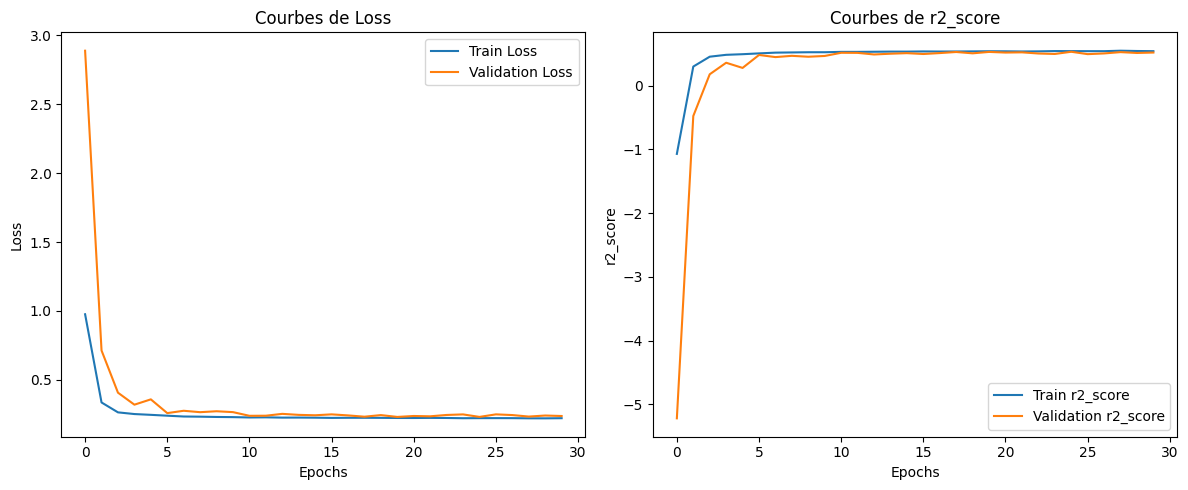

In [60]:

loss = history.history['loss']
val_loss = history.history['val_loss']
r2_score = history.history['r2_score']
val_r2_score = history.history['val_r2_score']

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Courbes de Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(r2_score, label='Train r2_score')
plt.plot(val_r2_score, label='Validation r2_score')
plt.title('Courbes de r2_score')
plt.xlabel('Epochs')
plt.ylabel('r2_score')
plt.legend()

plt.tight_layout()
plt.show()
